# Lab 1-2. Linear Regression

*   Regression: input data x를 output data y로 매핑하는 모델 f를 찾는것.
*   Linear Regression: 모델 f가 linear model, 즉 f(x)=wx+b



### Load File from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
file = open('/content/drive/MyDrive/Colab Notebooks/쏘카_Ai_엔지니어_육성_부트캠프_2기/1주차/data/regression_data.txt','r')  # open the file with read-only
text = file.readlines()  # read all line texts
file.close()  # close the file

x_data = []
y_data = []

# convert to float
for s in text:
    data = s.split()
    x_data.append(float(data[0]))
    y_data.append(float(data[1]))    

import numpy as np
# convert to numpy-array
x_data = np.asarray(x_data, dtype=np.float32)
y_data = np.asarray(y_data, dtype=np.float32)

print("shape of input data: ", x_data.shape)
print("shape of output data: ", y_data.shape)

shape of input data:  (100,)
shape of output data:  (100,)


### Plot data

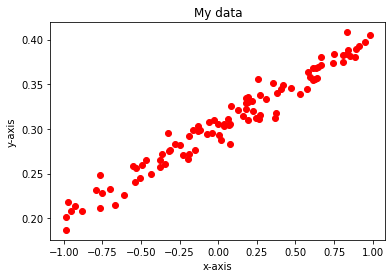

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1)
plt.plot(x_data, y_data, 'ro') # plot data

plt.xlabel('x-axis')  
plt.ylabel('y-axis')
plt.title('My data')

plt.show()

### Closed Form Linear Regression

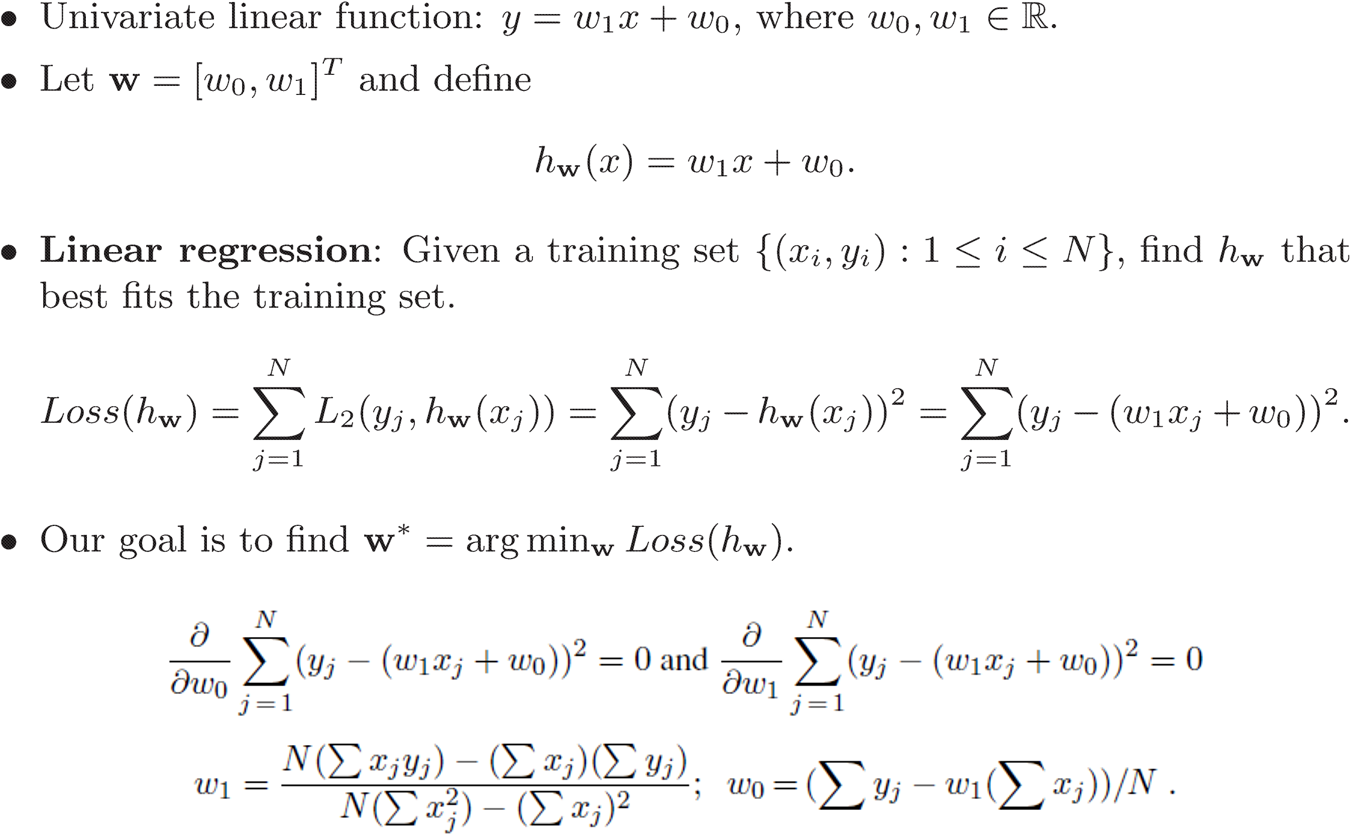

In [ ]:
N = len(x_data) # the size of data

sum_of_x = np.sum(x_data)
sum_of_x_square = np.sum(x_data * x_data)
sum_of_y = np.sum(y_data)
sum_of_xy = np.sum(x_data * y_data)

a = (N * sum_of_xy - sum_of_x * sum_of_y ) / (N * sum_of_x_square - sum_of_x ** 2) 
b = (sum_of_y - a * sum_of_x) / N

print ('a : {}'.format(a))
print ('b : {}'.format(b))

a : 0.09899378873058774
b : 0.3020929764555586


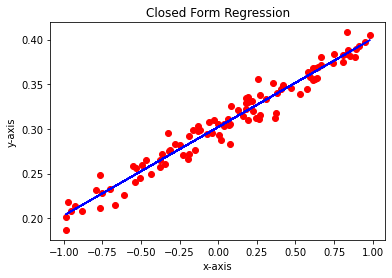

In [ ]:
plt.figure(2)

y_regression = a * x_data + b

plt.plot(x_data, y_data, 'ro')
plt.plot(x_data, y_regression, 'b')

plt.xlabel('x-axis')  
plt.ylabel('y-axis')
plt.title('Closed Form Regression')

plt.show()

### Gradient Descent로 Linear Regression (PyTorch 맛보기)

만약 Closed-form solution이 없는 경우, 혹은 데이터가 너무 많거나 계산이 매우 복잡하여 정답을 구하기 힘든 경우에는?
- 경사하강법 (gradient descent) 이용
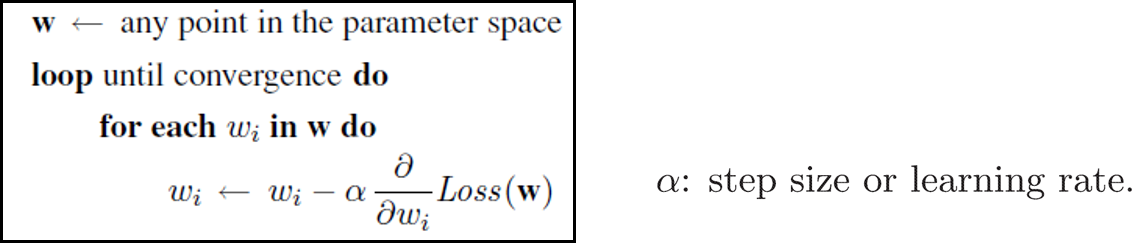

PyTorch 패키지를 이용하면 미분을 직접할 필요 없이
Loss를 정의, Gradient를 계산, weight를 update까지 해줄 수 있습니다!

In [ ]:
import torch
import torch.nn as nn # neural net 모델 묶음

In [ ]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 100
learning_rate = 0.1


In [ ]:
# Linear regression model, y = Wx+b
model = nn.Linear(input_size, output_size) 

In [ ]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [ ]:
print(x_data.shape, y_data.shape)
if len(x_data.shape)==1 and len(y_data.shape)==1:
  x_data = np.expand_dims(x_data, axis=-1)
  y_data = np.expand_dims(y_data, axis=-1)
print(x_data.shape, y_data.shape)

(100, 1) (100, 1)
(100, 1) (100, 1)


In [ ]:
# Train the model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x_data)
    targets = torch.from_numpy(y_data)

    # Predict outputs with the linear model.
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # compute gradients and update
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [5/100], Loss: 0.1729
Epoch [10/100], Loss: 0.0184
Epoch [15/100], Loss: 0.0021
Epoch [20/100], Loss: 0.0003
Epoch [25/100], Loss: 0.0001
Epoch [30/100], Loss: 0.0001
Epoch [35/100], Loss: 0.0001
Epoch [40/100], Loss: 0.0001
Epoch [45/100], Loss: 0.0001
Epoch [50/100], Loss: 0.0001
Epoch [55/100], Loss: 0.0001
Epoch [60/100], Loss: 0.0001
Epoch [65/100], Loss: 0.0001
Epoch [70/100], Loss: 0.0001
Epoch [75/100], Loss: 0.0001
Epoch [80/100], Loss: 0.0001
Epoch [85/100], Loss: 0.0001
Epoch [90/100], Loss: 0.0001
Epoch [95/100], Loss: 0.0001
Epoch [100/100], Loss: 0.0001


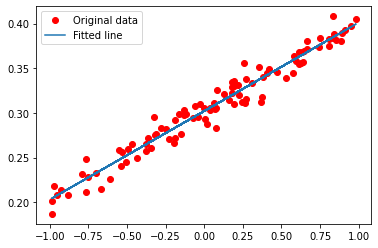

In [ ]:
# Plot the graph
predicted = model(torch.from_numpy(x_data)).detach().numpy() # .detach() : 모델이 가지고 있는 미분값 등을 없애준다
plt.plot(x_data, y_data, 'ro', label='Original data')
plt.plot(x_data, predicted, label='Fitted line')
plt.legend()
plt.show()

## HW1
데이터셋의 크기가 1/10이 되었을때도 gradient descent를 이용한 linear regression이 잘 동작하는지 강의에서 배운 k-fold cross validation (k=5)을 활용해서 확인해보세요. 
그리고 데이터셋의 크기가 원래 사이즈였을 때도 똑같이 k-fold cross validation (k=5)를 진행해서 두 경우의 validation loss (k round의 평균 test loss)를 비교해보세요.

###참고사항
1.   위에 주어진 코드에서는 학습 방법에 초점이 맞춰져 test set이 따로 없었지만, 실제로 학습을 진행할때는 validation set이나 test set을 통해 성능을 확인하는 것이 필수적입니다!
2.   전체 데이터를 k개의 부분집합으로 나누기 위해서 아래와 같은 sklearn 라이브러리의 KFold 클래스를 사용해도 되지만,
```
from sklearn.model_selection import KFold
```
연습을 위해서 Lab 1-1에서 배운 Slicing을 통해서 데이터셋을 k개로 나누고
k round의 learning을 진행해주세요.





In [ ]:
file = open('/content/drive/MyDrive/Colab Notebooks/쏘카_Ai_엔지니어_육성_부트캠프_2기/1주차/data/regression_data.txt','r')  # open the file with read-only
text = file.readlines()  # read all line texts
file.close()  # close the file

x_data = []
y_data = []

# convert to float
for idx,s in enumerate(text):
    if idx%10==0:
      data = s.split()
      x_data.append(float(data[0]))
      y_data.append(float(data[1]))    

# convert to numpy-array
x_data = np.asarray(x_data, dtype=np.float32)
y_data = np.asarray(y_data, dtype=np.float32)

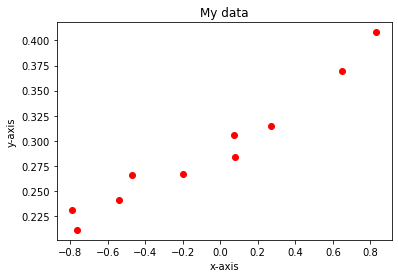

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1)
plt.plot(x_data, y_data, 'ro') # plot data

plt.xlabel('x-axis')  
plt.ylabel('y-axis')
plt.title('My data')

plt.show()

In [ ]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 100
learning_rate = 0.1

In [ ]:
# Linear regression model, y = Wx+b
model = nn.Linear(input_size, output_size) 

In [ ]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [ ]:
print(x_data.shape, y_data.shape)
if len(x_data.shape)==1 and len(y_data.shape)==1:
  x_data = np.expand_dims(x_data, axis=-1)
  y_data = np.expand_dims(y_data, axis=-1)
print(x_data.shape, y_data.shape)

(10,) (10,)
(10, 1) (10, 1)


In [ ]:
# Train the model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x_data)
    targets = torch.from_numpy(y_data)

    # Predict outputs with the linear model.
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # compute gradients and update
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [5/100], Loss: 0.1391
Epoch [10/100], Loss: 0.0466
Epoch [15/100], Loss: 0.0228
Epoch [20/100], Loss: 0.0124
Epoch [25/100], Loss: 0.0070
Epoch [30/100], Loss: 0.0040
Epoch [35/100], Loss: 0.0023
Epoch [40/100], Loss: 0.0014
Epoch [45/100], Loss: 0.0008
Epoch [50/100], Loss: 0.0005
Epoch [55/100], Loss: 0.0004
Epoch [60/100], Loss: 0.0003
Epoch [65/100], Loss: 0.0002
Epoch [70/100], Loss: 0.0002
Epoch [75/100], Loss: 0.0002
Epoch [80/100], Loss: 0.0002
Epoch [85/100], Loss: 0.0002
Epoch [90/100], Loss: 0.0002
Epoch [95/100], Loss: 0.0002
Epoch [100/100], Loss: 0.0002


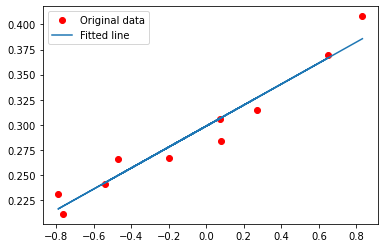

In [ ]:
# Plot the graph
predicted = model(torch.from_numpy(x_data)).detach().numpy() # .detach() : 모델이 가지고 있는 미분값 등을 없애준다
plt.plot(x_data, y_data, 'ro', label='Original data')
plt.plot(x_data, predicted, label='Fitted line')
plt.legend()
plt.show()

### Gradient Descent로 Linear Regression (K-fold cross validation)

In [ ]:
file = open('/content/drive/MyDrive/Colab Notebooks/쏘카_Ai_엔지니어_육성_부트캠프_2기/1주차/data/regression_data.txt','r')  # open the file with read-only
text = file.readlines()  # read all line texts
file.close()  # close the file

x_data = []
y_data = []

x_val = []
y_val = []

# convert to float
for idx,s in enumerate(text):
    if idx%5 != 0:
      data = s.split()
      x_data.append(float(data[0]))
      y_data.append(float(data[1]))    
    else:
      data = s.split()
      x_val.append(float(data[0]))
      y_val.append(float(data[1]))

# convert to numpy-array
x_data = np.asarray(x_data, dtype=np.float32)
y_data = np.asarray(y_data, dtype=np.float32)
x_val = np.asarray(x_val, dtype=np.float32)
y_val = np.asarray(y_val, dtype=np.float32)

In [ ]:
x_data.shape, y_data.shape, x_val.shape, y_val.shape

((80, 1), (80, 1), (20,), (20,))

In [ ]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 100
learning_rate = 0.1

In [ ]:
# Linear regression model, y = Wx+b
model = nn.Linear(input_size, output_size) 

In [ ]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [ ]:
print(x_data.shape, y_data.shape, x_val.shape, y_val.shape)
if len(x_data.shape)==1 and len(y_data.shape)==1:
  x_data = np.expand_dims(x_data, axis=-1)
  y_data = np.expand_dims(y_data, axis=-1)
if len(x_val.shape)==1 and len(y_val.shape)==1:
  x_val = np.expand_dims(x_val, axis=-1)
  y_val = np.expand_dims(y_val, axis=-1)
print(x_data.shape, y_data.shape, x_val.shape, y_val.shape)

(80, 1) (80, 1) (20,) (20,)
(80, 1) (80, 1) (20, 1) (20, 1)


In [ ]:
# Train the model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x_data)
    targets = torch.from_numpy(y_data)
    
    val_inputs = torch.from_numpy(x_val)
    val_targets = torch.from_numpy(y_val)

    # Predict outputs with the linear model.
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    val_outputs = model(val_inputs)
    val_loss = criterion(val_outputs, val_targets)
    
    # compute gradients and update
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
        print ('Epoch [{}/{}], val_Loss: {:.4f}'.format(epoch+1, num_epochs, val_loss.item()))

Epoch [5/100], Loss: 0.0001
Epoch [5/100], val_Loss: 0.0002
Epoch [10/100], Loss: 0.0001
Epoch [10/100], val_Loss: 0.0002
Epoch [15/100], Loss: 0.0001
Epoch [15/100], val_Loss: 0.0002
Epoch [20/100], Loss: 0.0001
Epoch [20/100], val_Loss: 0.0002
Epoch [25/100], Loss: 0.0001
Epoch [25/100], val_Loss: 0.0002
Epoch [30/100], Loss: 0.0001
Epoch [30/100], val_Loss: 0.0002
Epoch [35/100], Loss: 0.0001
Epoch [35/100], val_Loss: 0.0002
Epoch [40/100], Loss: 0.0001
Epoch [40/100], val_Loss: 0.0002
Epoch [45/100], Loss: 0.0001
Epoch [45/100], val_Loss: 0.0002
Epoch [50/100], Loss: 0.0001
Epoch [50/100], val_Loss: 0.0002
Epoch [55/100], Loss: 0.0001
Epoch [55/100], val_Loss: 0.0002
Epoch [60/100], Loss: 0.0001
Epoch [60/100], val_Loss: 0.0002
Epoch [65/100], Loss: 0.0001
Epoch [65/100], val_Loss: 0.0002
Epoch [70/100], Loss: 0.0001
Epoch [70/100], val_Loss: 0.0002
Epoch [75/100], Loss: 0.0001
Epoch [75/100], val_Loss: 0.0002
Epoch [80/100], Loss: 0.0001
Epoch [80/100], val_Loss: 0.0002
Epoch [85/